# ASSIGNMENT 3:  TRANSIENT TEMPERATURE PROFILE FOR CONCENTRIC CYLINDRICAL HEAT EXCHANGER

<IPython.core.display.Javascript object>


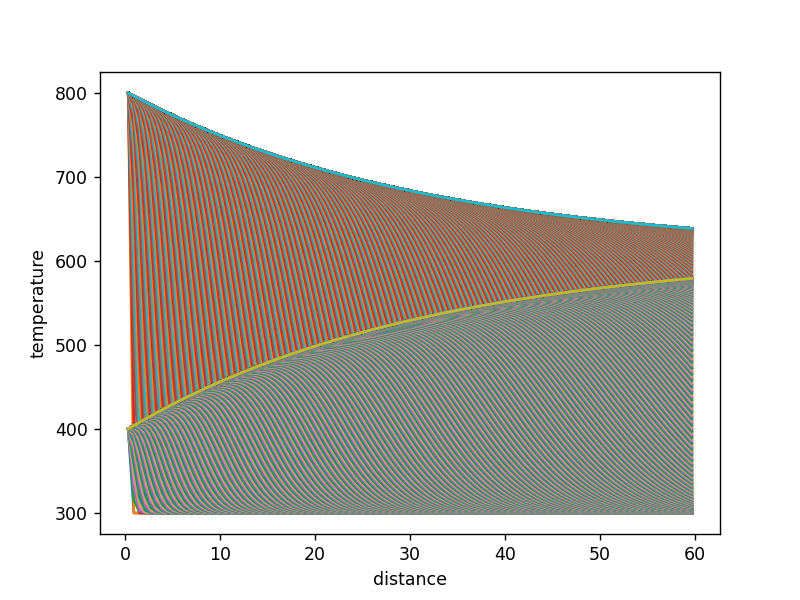

<IPython.core.display.Javascript object>


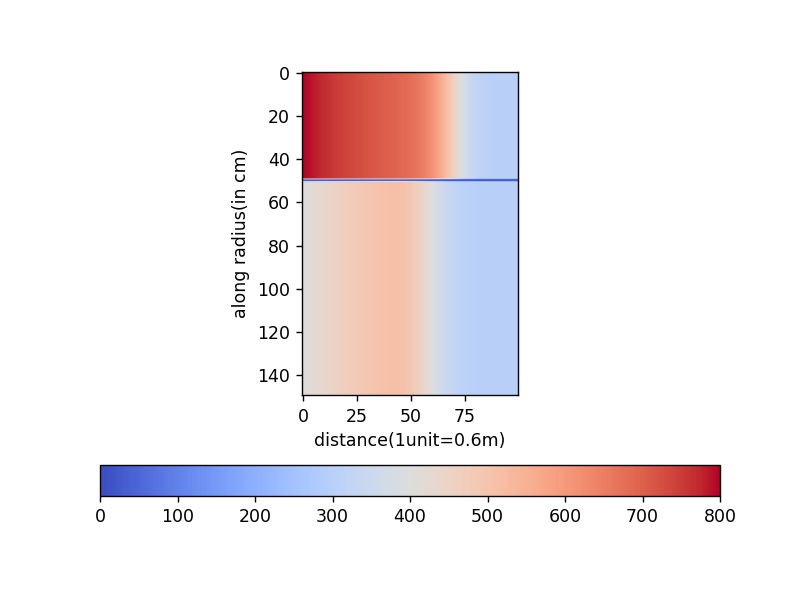

In [6]:
%matplotlib notebook
import sys, os.path
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation


pi=3.142
L=60
r1=0.1
r2=0.15
n=100
m1=3
cp1=4180
rho1=1000
m2=5
cp2=4180
rho2=1000
T0=300
T1i=400
T2i=800
U=340
T=1000
delx=L/n
delt=1
gm1=delt/(rho1*cp1*pi*r1*r1*delx)
gm2=delt/(rho2*cp2*pi*(r2*r2-r1*r1)*delx)

arr1=np.zeros((n,1001))
arr2=np.zeros((n,1001))

arr1[:,0]=T0
arr2[:,0]=T0
arr1[0,:]=T1i
arr2[0,:]=T2i
x=np.linspace(delx/2,L-delx/2,n) 

for k in range(1,1001):
    for i in range(1,100):
        arr1[i,k]= gm1*(   m1*cp1*(arr1[i-1,k-1]-arr1[i,k-1])  + U*2*pi*r1*delx*(arr2[i,k-1]-arr1[i,k-1])  )+arr1[i,k-1]
        arr2[i,k]= gm2 *(m2*cp2*(arr2[i-1,k-1]-arr2[i,k-1])  - U*2*pi*r2*delx*(arr2[i,k-1]-arr1[i,k-1]))+arr2[i,k-1]
        
array=np.zeros((150,n,1001))
for i in range(50):
    array[i,:,:]=arr2[:,:]
for i in range(51,150):
    array[i,:,:]=arr1[:,:]
    
plt.figure(1)

plt.xlabel("distance")
plt.ylabel("temperature")
for i in range(1000):
    plt.plot(x,arr1[:,i],x,arr2[:,i])

    plt.pause(0.005) 

fig=plt.figure()  
def animate(i):
  global image
  image = plt.imshow(array[:,:,i], cmap='coolwarm')
  plt.xlabel("distance(1unit=0.6m)")
  plt.ylabel("along radius(in cm)")

  return image, 

anim = FuncAnimation(fig, animate,frames = 1000, interval = 10,repeat=False, blit = True)
image = plt.imshow(array[:,:,1000], cmap='coolwarm')
plt.colorbar(image,orientation='horizontal')
plt.show()

# PLOTS AT T=1000sec

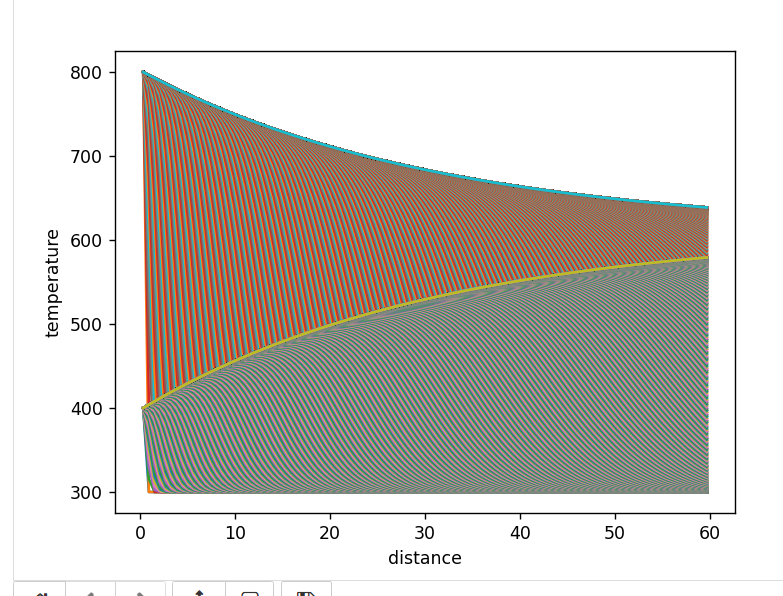

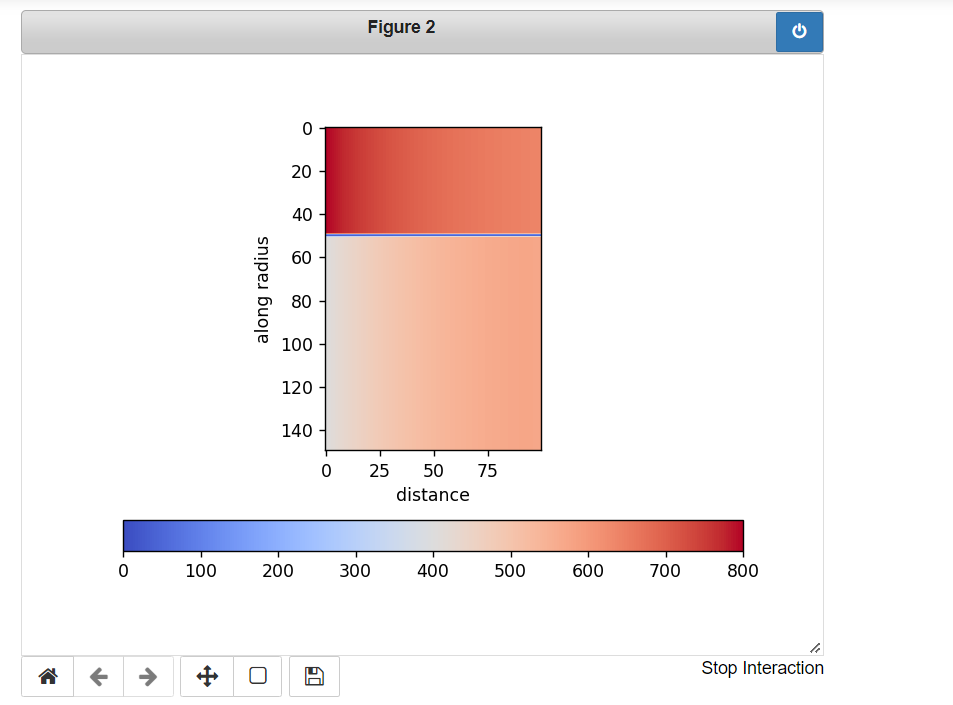